In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
house_path = '/content/Housing.csv'

In [6]:
df = pd.read_csv(house_path)

In [7]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
df_corr = df[['area', 'price']].corr()
df_corr

,area,price
area,1.000000,0.535997
price,0.535997,1.000000


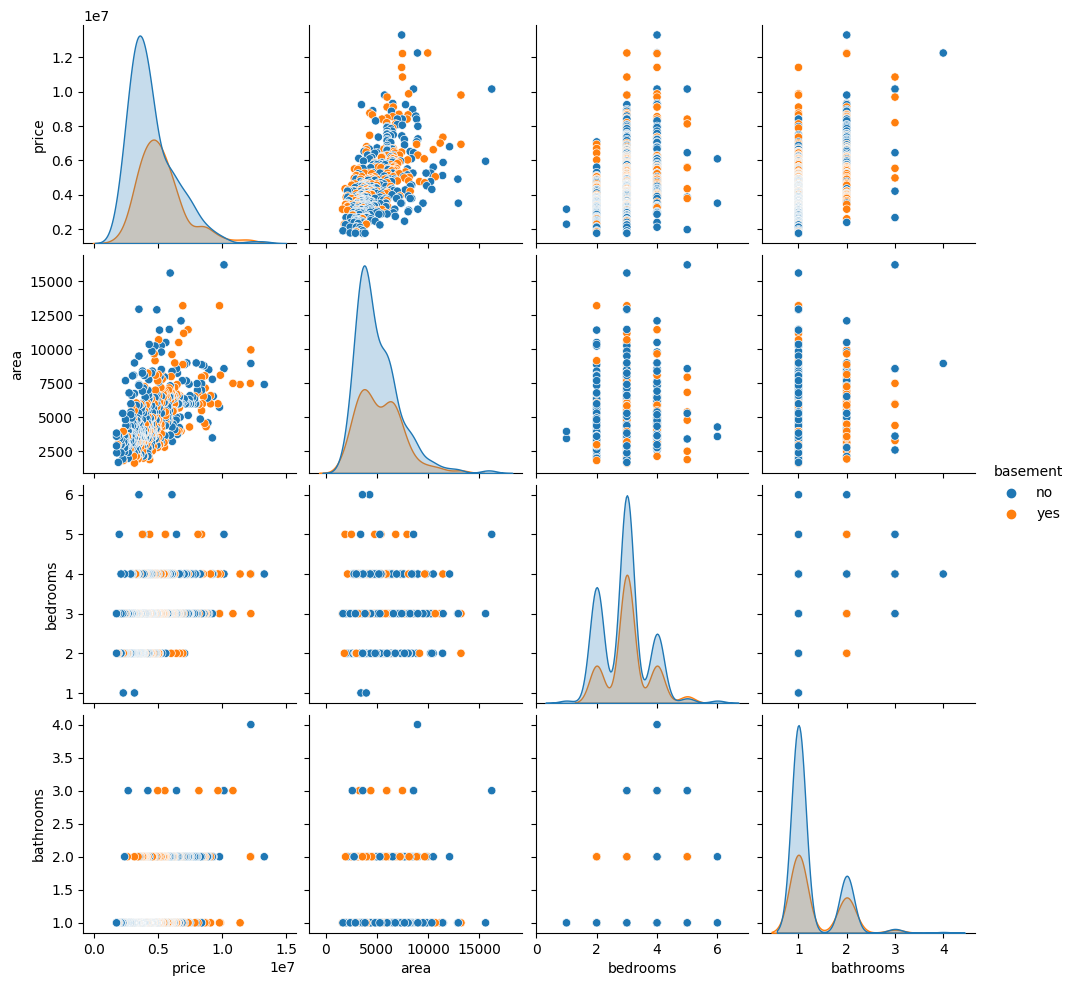

In [10]:
sns.pairplot(df,
             vars = ['price', 'area', 'bedrooms', 'bathrooms'],
             hue = 'basement')

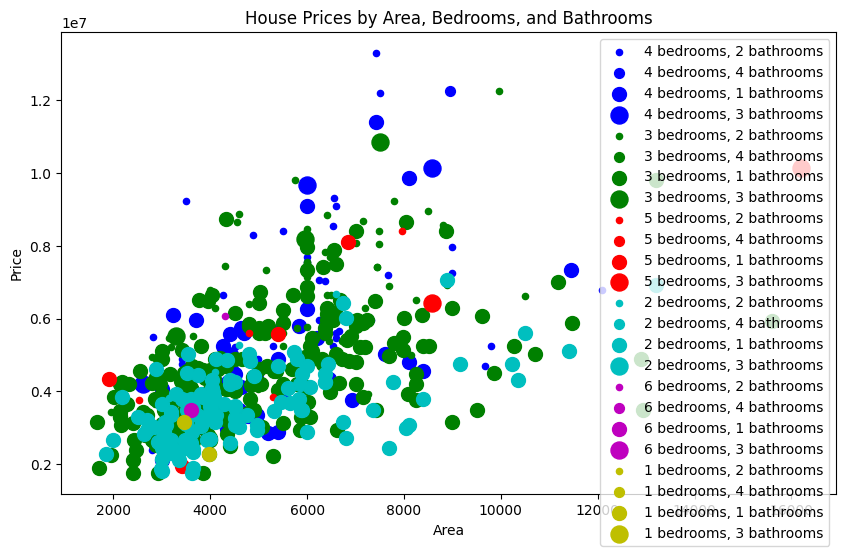

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
sizes = [20, 50, 100, 150, 200]

for i, bedrooms in enumerate(df['bedrooms'].unique()):
    for j, bathrooms in enumerate(df['bathrooms'].unique()):
        subset = df[(df['bedrooms']==bedrooms) & (df['bathrooms']==bathrooms)]
        ax.scatter(subset['area'], subset['price'], c=colors[i], s=sizes[j], label='{} bedrooms, {} bathrooms'.format(bedrooms, bathrooms))

ax.legend()
ax.set_xlabel('Area')
ax.set_ylabel('Price')
ax.set_title('House Prices by Area, Bedrooms, and Bathrooms')
plt.show()

### Дане домашнє завдання буде повністю пов'язане з лінійною регресією та її реалізацією. Отож розіб'ємо наше домашнє завдання на декілька частин:

* напишіть функцію гіпотези лінійної регресії у векторному вигляді;

In [8]:
def h(w_0, w_1, x):
  return w_0 + w_1*x

* створіть функцію для обчислення функції втрат у векторному вигляді;


In [12]:
def loss_function(df, w_0, w_1):

    m = df.shape[0]
    cost = 0 

    for x, y in zip(df.area, df.price):

      cost = cost + (h(w_0, w_1, x) - y)**2

    return cost/(2*m)

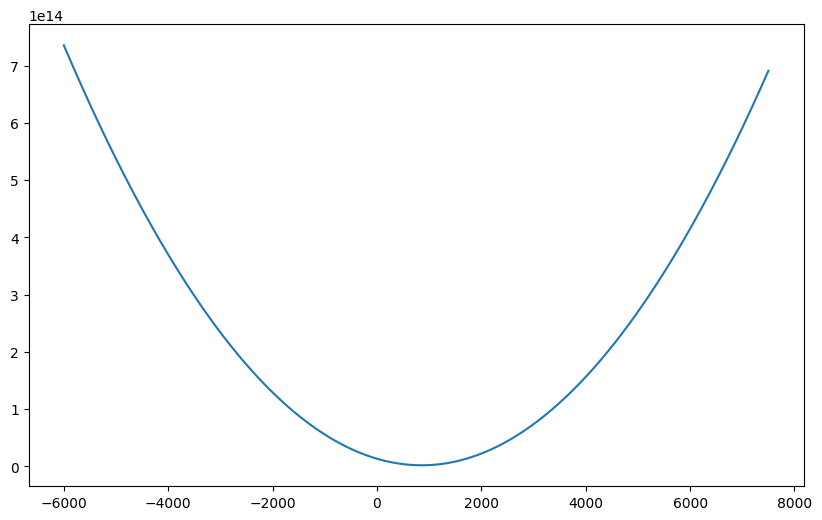

In [14]:
w_0 = 0

w_1 = np.linspace(-6000, 7500, 500)

plt.figure(figsize = (10, 6))
plt.plot(w_1, [loss_function(df, w_0, w) for w in w_1])
plt.show()

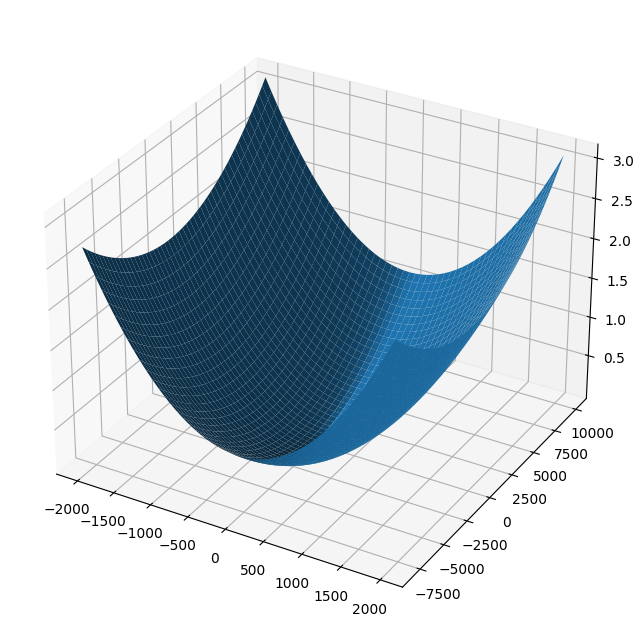

In [24]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection="3d")

grid_w_0 = np.arange(-2000, 2000, 10)
grid_w_1 = np.arange(-8000, 10000, 20)
x, y = np.meshgrid(grid_w_0, grid_w_1)
z = loss_function(norm_df, x, y)

ax.plot_surface(x, y, z)
plt.show()

* реалізуйте один крок градієнтного спуску;

In [17]:
def grad_step(w_0, w_1, grad_w_0, grad_w_1, learning_rate = 0.001):

    w_0 = w_0 - learning_rate*grad_w_0
    w_1 = w_1 - learning_rate*grad_w_1

    return w_0, w_1

In [18]:
def grad_w_0(df, w_0, w_1):

    m = df.shape[0]
    cost = 0 

    for x, y in zip(df.area, df.price):

      cost = cost + (h(w_0, w_1, x) - y)

    return cost/m

def grad_w_1(df, w_0, w_1):

    m = df.shape[0]
    cost = 0 

    for x, y in zip(df.area, df.price):

      cost = cost + (h(w_0, w_1, x) - y)*x

    return cost/m

### Normalization

In [20]:
def normalization(data):

    mean = np.mean(data)
    value_range = np.max(data) - np.min(data)
    result = []
    for x in data:
      norm_x = (x - mean)/value_range
      result.append(norm_x)

    return result

In [21]:
norm_df = pd.DataFrame()

In [22]:
norm_df['price'] = normalization(df.price)
norm_df['area'] = normalization(df.area)

In [23]:
norm_df.head(7)

,price,area
0,0.738811,0.155977
1,0.647902,0.261818
2,0.647902,0.330547
3,0.644872,0.161475
4,0.575175,0.155977
5,0.526690,0.161475
6,0.466084,0.235702


In [19]:
def grad_descent(w_0, w_1, df, num_iter, learning_rate = 0.001, epsilon = 0.0000001):

    loss = loss_function(df, w_0, w_1)
    loss_history = [loss]

    for i in range(num_iter):

      d_w_0 = grad_w_0(df, w_0, w_1)
      d_w_1 = grad_w_1(df, w_0, w_1)

      w_0, w_1 = grad_step(w_0, w_1, d_w_0, d_w_1, learning_rate = learning_rate)

      loss = loss_function(df, w_0, w_1)

      if abs(loss - loss_history[-1]) < epsilon:
        loss_history.append(loss)
        break

      loss_history.append(loss)

    return w_0, w_1, loss_history

In [41]:
w_0, w_1, loss_history = grad_descent(w_0, w_1, norm_df, 1000, learning_rate = 0.1)

Step 1

w_0 = 2.2097512402975013e-17

w_1 = 0.012781638994031962

Step 2

w_0 = 4.2875998368436706e-17

w_1 = 0.5203332636457754

In [42]:
w_0

3.711607983242271e-17

In [43]:
w_1

0.5504136158711331

In [45]:
loss_history

[0.00933949522772634, 0.009339445969048798]

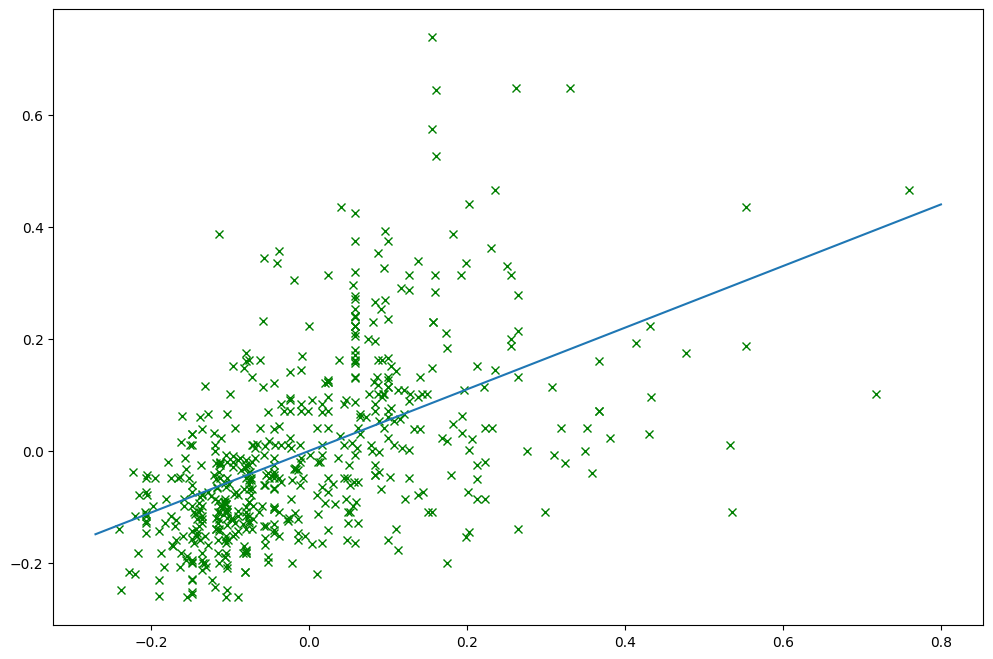

In [46]:
plt.figure(figsize=(12,8))
plt.plot(norm_df.area, norm_df.price, 'gx')
x = np.linspace(-0.27, 0.8, 500)
plt.plot(x, h(w_0, w_1, x))

plt.show()

In [47]:
X = np.array([norm_df.area]).T

y = np.array(norm_df.price)

reg = LinearRegression().fit(X, y)

In [48]:
reg.score(X, y)

0.2872931546811467

In [49]:
reg.coef_

array([0.58196837])

In [50]:
reg.intercept_

6.353102831524844e-17

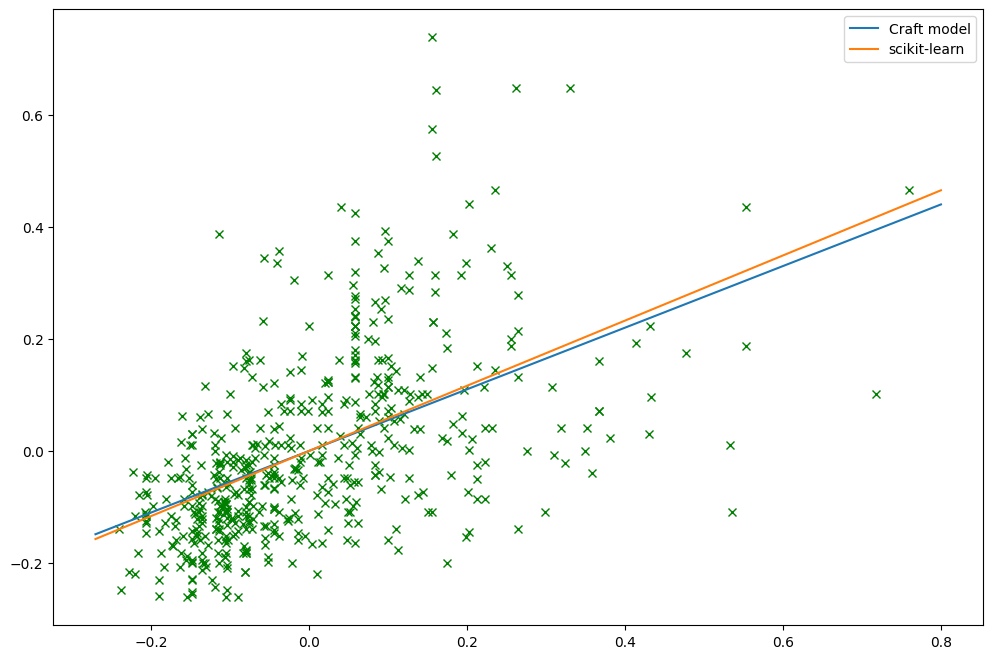

In [51]:
plt.figure(figsize=(12,8))
plt.plot(norm_df.area, norm_df.price, 'gx')
x = np.linspace(-0.27, 0.8, 500)
plt.plot(x, h(w_0, w_1, x), label = 'Craft model')
plt.plot(x, h(reg.intercept_, reg.coef_[0], x), label = 'scikit-learn')
plt.legend()

plt.show()

* знайдіть найкращі параметри 
w
  для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

In [52]:
norm_df.head(7)

,price,area
0,0.738811,0.155977
1,0.647902,0.261818
2,0.647902,0.330547
3,0.644872,0.161475
4,0.575175,0.155977
5,0.526690,0.161475
6,0.466084,0.235702


In [53]:
norm_df['bedrooms'] = normalization(df.bedrooms)
norm_df['bathrooms'] = normalization(df.bathrooms)

In [54]:
norm_df.head(4)

,price,area,bedrooms,bathrooms
0,0.738811,0.155977,0.206972,0.237920
1,0.647902,0.261818,0.206972,0.904587
2,0.647902,0.330547,0.006972,0.237920
3,0.644872,0.161475,0.206972,0.237920


In [55]:
X = np.array([norm_df.area, norm_df.bedrooms, norm_df.bathrooms]).T

y = np.array(norm_df.price)

reg = LinearRegression().fit(X, y)

In [56]:
reg.score(X, y)

0.4870830667058762

In [57]:
reg.coef_

array([0.47714269, 0.17611257, 0.36001286])

In [58]:
reg.intercept_

7.014204135081996e-17

In [62]:
def hh(w, X):
  return w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3

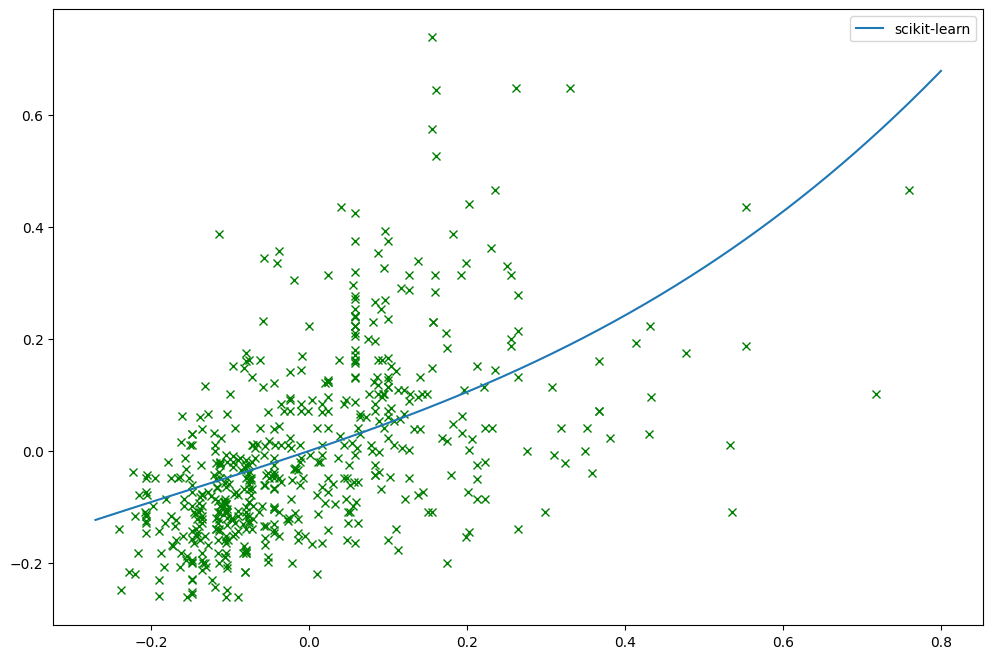

In [64]:
plt.figure(figsize=(12,8))
plt.plot(norm_df.area, norm_df.price, 'gx')
x = np.linspace(-0.27, 0.8, 500)
plt.plot(x, hh([reg.intercept_] + list(reg.coef_), x), label='scikit-learn')
plt.legend()

plt.show()

* знайдіть ці ж параметри за допомогою аналітичного рішення;


In [79]:
from sklearn.preprocessing import StandardScaler
X = norm_df[["area", "bedrooms", "bathrooms"]].values
y = norm_df["price"].values

# normalize the input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# add a column of ones for the intercept term
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# compute the parameters of the linear regression using the normal equation
w = np.linalg.inv(X.T @ X) @ X.T @ y

In [80]:
w

array([1.30445706e-16, 7.11007916e-02, 2.59726036e-02, 6.02431621e-02])

In [86]:
def hhh(w, x):
    return w[0] + np.sum(w[1:] * x, axis=1)


* порівняйте отримані результати.

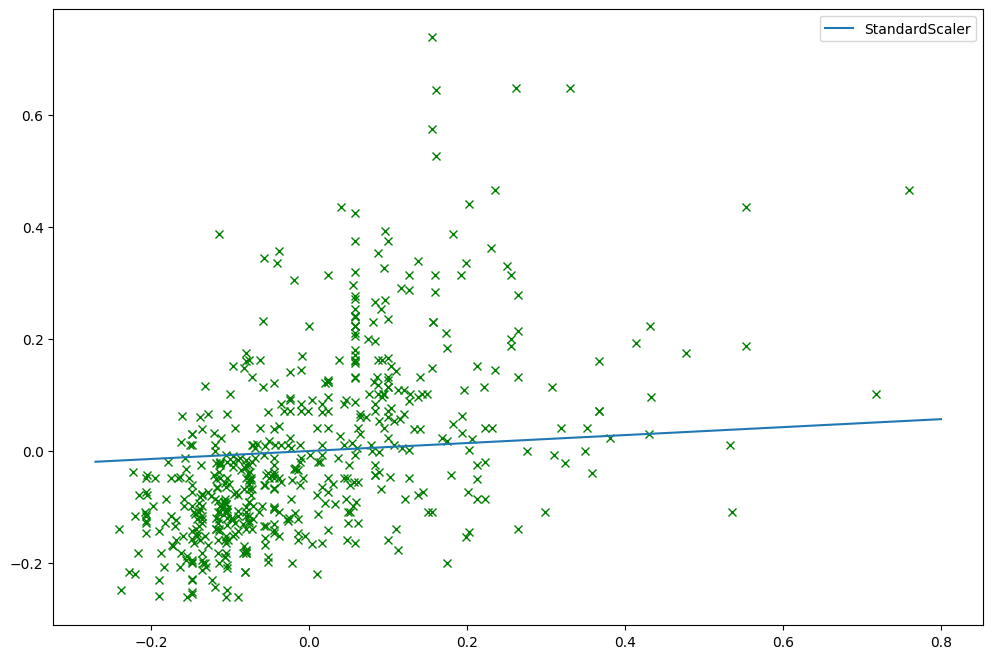

In [90]:
plt.figure(figsize=(12,8))
plt.plot(norm_df.area, norm_df.price, 'gx')
x = np.linspace(-0.27, 0.8, 500)
plt.plot(x, hhh(w, np.array([x, np.zeros_like(x), np.zeros_like(x)]).T), label='StandardScaler')
plt.legend()

plt.show()

In [77]:
X = norm_df[["area", "bedrooms", "bathrooms"]].values
y = norm_df["price"].values
# додаємо стовпець з одиницями до матриці ознак X
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# обчислюємо параметри лінійної регресії за допомогою нормального рівняння
w1 = np.linalg.inv(X.T @ X) @ X.T @ y

In [78]:
w1

array([1.81175091e-17, 4.77142690e-01, 1.76112569e-01, 3.60012857e-01])

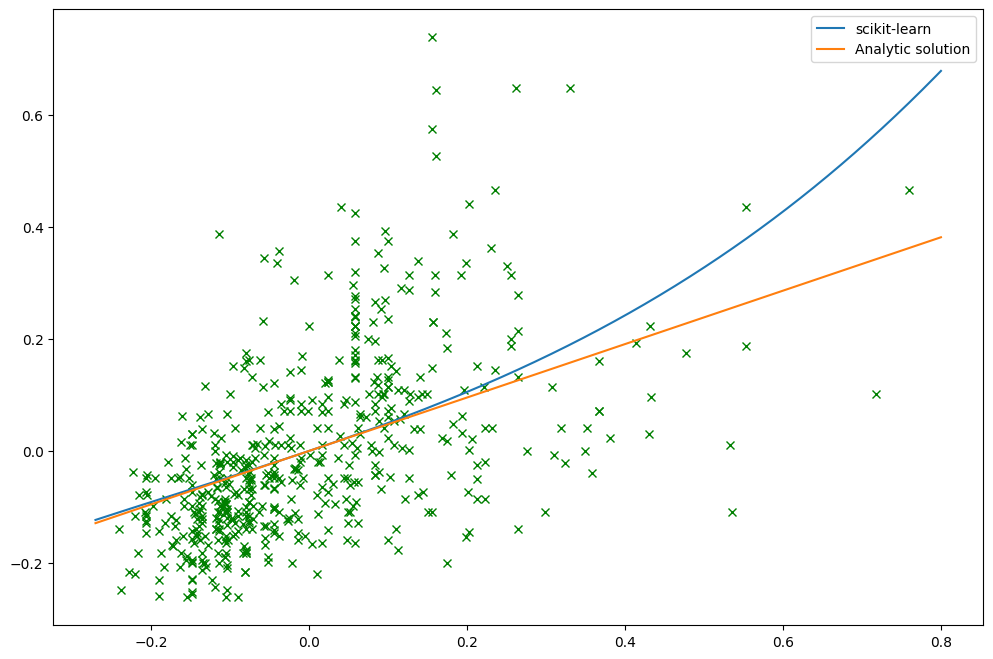

In [96]:
plt.figure(figsize=(12,8))
plt.plot(norm_df.area, norm_df.price, 'gx')
x = np.linspace(-0.27, 0.8, 500)
plt.plot(x, hh([reg.intercept_] + list(reg.coef_), x), label='scikit-learn')
plt.plot(x, w1[0] + w1[1]*x + w1[2]*norm_df.bedrooms.mean() + w1[3]*norm_df.bathrooms.mean(), label = 'Analytic solution')
plt.legend()

plt.show()